In [0]:
import numpy as np
import matplotlib.pyplot as plt

hello world

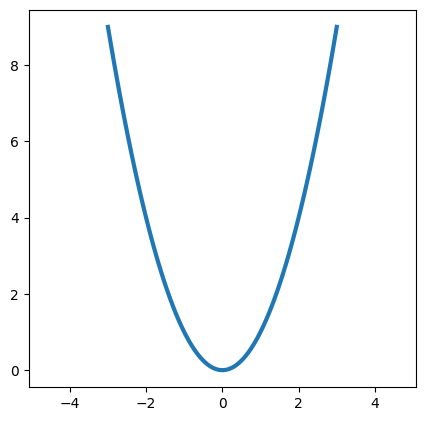

In [0]:
x = np.linspace(-3, 3, 100)
y = x**2

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(x, y, color='C0', linewidth=3)

plt.axis('equal')
plt.show()

In [0]:
#Anscombe's Quartet
def anscombe(n=1):
  assert 1 <= n and n <= 4
  X = np.vstack([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
  if n == 1:
    y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
  elif n == 2:
    y = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
  elif n == 2:
    y = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
  elif n == 2:
    X = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
    y = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
  X = np.vstack(X)
  y = np.asarray(y)
  return X, y

X, y = anscombe(1)

In [0]:
def y_hat(x, theta):
  ret = theta[0] + x*theta[1]
  return ret.ravel()

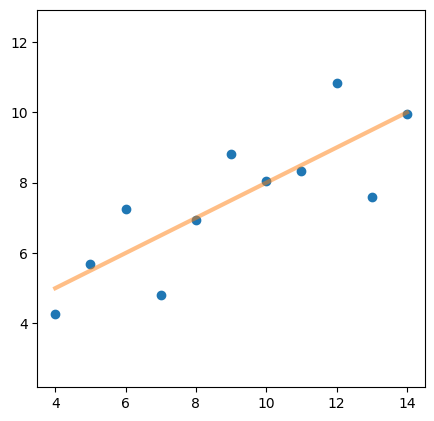

In [0]:
theta = np.asarray([3, .5])

plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(X, y, color='C0')

x_plot = np.linspace(X.min(), X.max(), 10)
plt.plot(x_plot, y_hat(x_plot, theta), color='C1', linewidth=3, alpha=.5)

plt.axis('equal')
plt.show()

In [0]:
import ipywidgets as widgets

def lineplot(beta0, beta1):
  plt.figure(figsize=(5, 5), dpi=100)
  plt.scatter(X, y, color='C0')
  x_plot = np.linspace(X.min(), X.max(), 10)
  e = np.sum((y - (beta0 + beta1*X.ravel()))**2)
  plt.plot(x_plot, beta0 + beta1*x_plot, color='C1', linewidth=3, alpha=.5)
  plt.axis('equal')
  plt.title("Squared error: %.1f" % e)
  plt.show()

widgets.interact(lineplot, beta0=(0, 10, 0.1), beta1=(-1, 1, 0.05));

interactive(children=(FloatSlider(value=5.0, description='beta0', max=10.0), FloatSlider(value=0.0, descriptio…

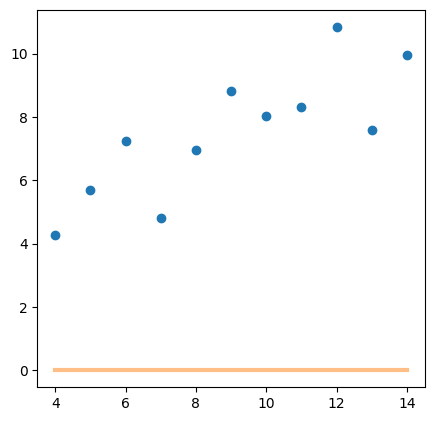

interactive(children=(FloatSlider(value=5.0, description='beta0', max=10.0), FloatSlider(value=0.0, descriptio…

In [0]:
#%matplotlib notebook
import ipywidgets as widgets

fig = plt.figure(figsize=(5, 5), dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X, y, color='C0')
beta0 = 0
beta1 = 0
x_plot = np.linspace(X.min(), X.max(), 10)
line, = ax.plot(x_plot, beta0 + beta1*x_plot, color='C1', linewidth=3, alpha=.5)
#ax.set_axis('equal')
fig.show()

def lineplot(beta0, beta1):
  e = np.sum((y - (beta0 + beta1*X.ravel()))**2)
  line.set_ydata(beta0 + beta1*x_plot)
#  plt.title("Squared error: %.1f" % e)
#  line.set_ydata(np.sin(w * x))
  fig.canvas.draw_idle()
#  fig.show()

widgets.interact(lineplot, beta0=(0, 10, 0.1), beta1=(-1, 1, 0.05));

In [0]:
%matplotlib -l

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'inline', 'ipympl', 'widget']


In [0]:
def loss(y, y_hat):
  return np.sum((y-y_hat)**2)

f = lambda theta: loss(y, y_hat(X, theta))

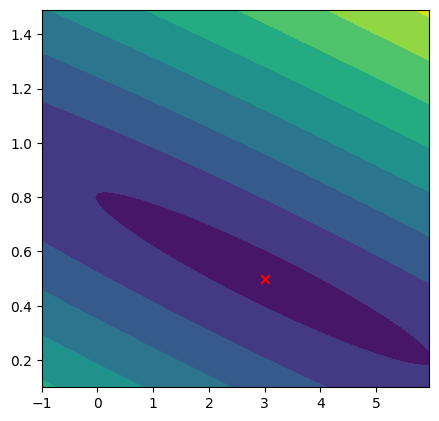

[3.  0.5]


In [0]:
xx, yy = np.meshgrid(np.arange(-1, 6, .05), # beta0
                      np.arange(.1, 1.5, .01)) # beta1
grid_coordinates = np.c_[xx.ravel(), yy.ravel()]
Z = np.apply_along_axis(f, 1, grid_coordinates)

theta = grid_coordinates[np.argmin(Z)]
Z = Z.reshape(xx.shape)

plt.figure(figsize=(5, 5), dpi=100)
cs = plt.contourf(xx, yy, np.sqrt(Z), cmap='viridis')
plt.scatter(theta[0], theta[1], c='r', marker='x')
plt.show()

print(theta)

In [0]:
l2_loss = loss
f_l2 = f
Z_l2 = Z

In [0]:
def l1_loss(y, y_hat):
  return np.sum(np.abs(y-y_hat))

f_l1 = lambda theta: l1_loss(y, y_hat(X, theta))

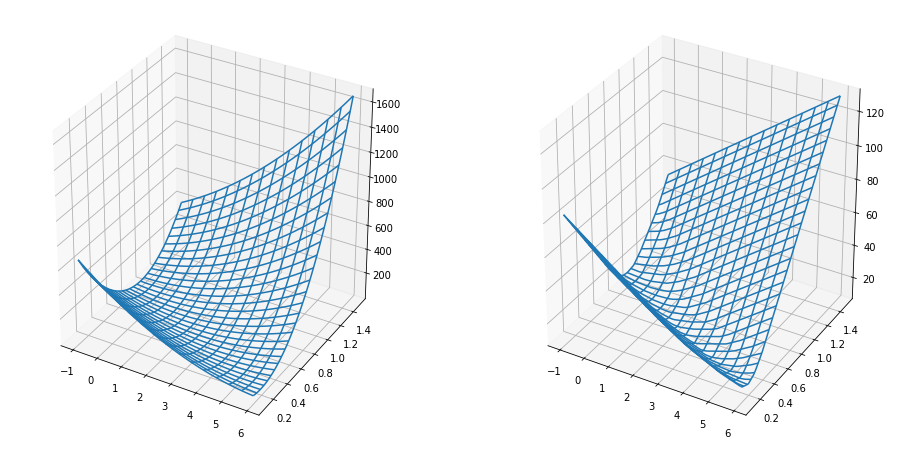

In [0]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

Z_l1 = np.apply_along_axis(f_l1, 1, grid_coordinates)
Z_l1 = Z_l1.reshape(xx.shape)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_wireframe(xx, yy, Z_l2, rstride=5, cstride=10)
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_wireframe(xx, yy, Z_l1, rstride=5, cstride=10)
plt.show()

In [0]:
from scipy.optimize import minimize

theta0 = np.random.uniform(-10, 10, size=2)

res = minimize(f_l2, theta0)
theta_l2 = res.x
print("Started at %s, found minima at %s" % (theta0, theta_l2))

res = minimize(f_l1, theta0)
theta_l1 = res.x
print("Started at %s, found minima at %s" % (theta0, theta_l1))

Started at [1.49588137 1.89321941], found minima at [3.00009145 0.50009085]
Started at [1.49588137 1.89321941], found minima at [3.05793778 0.49300443]


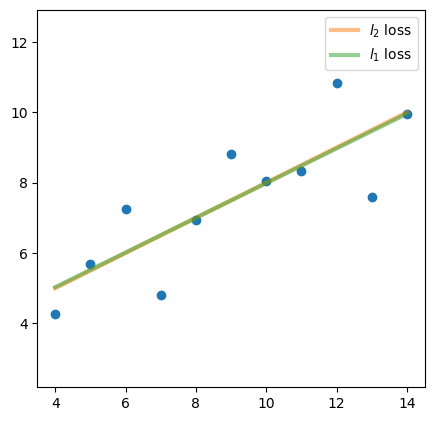

In [0]:
plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(X, y, color='C0')
x_plot = np.asarray([X.min(), X.max()])
plt.plot(x_plot, y_hat(x_plot, theta_l2), color='C1', linewidth=3, label="$l_2$ loss", alpha=.5)
plt.plot(x_plot, y_hat(x_plot, theta_l1), color='C2', linewidth=3, label="$l_1$ loss", alpha=.5)
plt.legend()
plt.axis('equal')
plt.show()